In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:/Users/赵豪杰/Desktop/lw/data/违规信息总表162458463/STK_Violation_Main.csv', error_bad_lines=False)
data = data[~data['ViolationType'].isna()]

b'Skipping line 32: expected 21 fields, saw 24\nSkipping line 78: expected 21 fields, saw 65\nSkipping line 239: expected 21 fields, saw 43\nSkipping line 337: expected 21 fields, saw 28\nSkipping line 341: expected 21 fields, saw 26\nSkipping line 380: expected 21 fields, saw 25\nSkipping line 438: expected 21 fields, saw 38\nSkipping line 959: expected 21 fields, saw 26\nSkipping line 1426: expected 21 fields, saw 23\nSkipping line 1543: expected 21 fields, saw 23\nSkipping line 1746: expected 21 fields, saw 23\nSkipping line 2087: expected 21 fields, saw 26\nSkipping line 2325: expected 21 fields, saw 92\nSkipping line 2649: expected 21 fields, saw 22\nSkipping line 3858: expected 21 fields, saw 47\nSkipping line 5263: expected 21 fields, saw 36\nSkipping line 5544: expected 21 fields, saw 25\nSkipping line 6390: expected 21 fields, saw 28\nSkipping line 6725: expected 21 fields, saw 32\nSkipping line 6975: expected 21 fields, saw 64\nSkipping line 7256: expected 21 fields, saw 29\n

<BarContainer object of 431 artists>

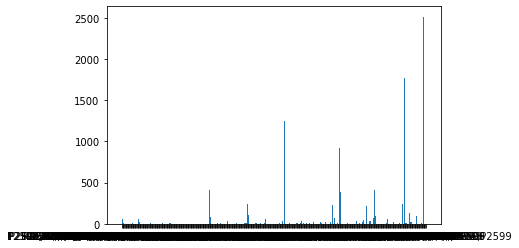

In [2]:
keep_name = ['ViolationID', 'ViolationType', 'ViolationTypeID', 'ViolationYear', 'DeclareDate']
group1 = data.groupby('ViolationTypeID')
group1.count()['ViolationID']
# # 按造假类型统计的条形图
plt.bar(group1.count()['ViolationID'].index, group1.count()['ViolationID'])

<BarContainer object of 2969 artists>

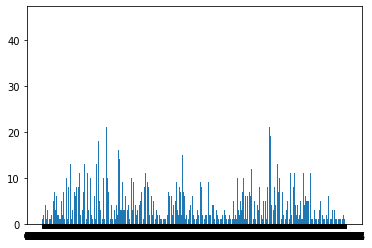

In [3]:
data['fraud'] = 1
group2 = data.groupby('Symbol')
group2.count()['ViolationID']
# 按公司ID统计公司违规处理次数条形图
plt.bar(group2.count()['ViolationID'].index, group2.count()['ViolationID'])

000409    9
300139    8
000719    8
600701    7
002181    6
         ..
002306    1
300113    1
300208    1
300491    1
000567    1
Name: Symbol, Length: 919, dtype: int64

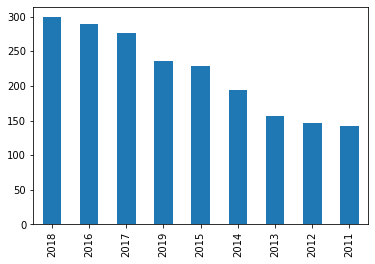

In [4]:
# 保留特定类型
type_list = ['P2501','P2502','P2503','P2504','P2505', 'P2506']
data_fraud = data[data['ViolationTypeID'].isin(type_list)]
data_fraud = data_fraud[~data_fraud['ViolationYear'].isna()][['Symbol', 'ViolationYear', 'DeclareDate', 'fraud']]

# 按行分割多个日期组合
data_fraud['ViolationYear'] = data_fraud['ViolationYear'].map(lambda x:x.split(','))
df = data_fraud.explode('ViolationYear')
df['ViolationYear'] = df['ViolationYear'].map(lambda x:x.split(';'))
df = df.explode('ViolationYear')
df['ViolationYear'].value_counts().plot.bar()


# 将字符串转换为时间
df['ViolationYear'] = df['ViolationYear'].map(lambda x: pd.to_datetime(x).year)
# 按年份筛选
df = df[(df['ViolationYear'] < 2020) & (df['ViolationYear'] > 2010)]
df['ViolationYear'].value_counts().plot.bar()
df['Symbol'].value_counts()

# 剔除同一家公司年份相同的
df.drop_duplicates(['Symbol', 'ViolationYear'], inplace=True)
df['ViolationYear'].value_counts().plot.bar()
df['Symbol'].value_counts()

In [5]:
# 连接资产负债表 data2
from matplotlib.pyplot import axis


data2 = pd.read_csv('C:/Users/赵豪杰/Desktop/lw/data/资产负债表160133267/FS_Combas.csv', error_bad_lines=False)
data2.columns[:15]
data2_Copy = data2.copy()

# 筛选年份
data2['Accper_year'] = data2['Accper'].map(lambda x: pd.to_datetime(x).year)
data2['Accper_month'] = data2['Accper'].map(lambda x: pd.to_datetime(x).month)
data2['Accper_day'] = data2['Accper'].map(lambda x: pd.to_datetime(x).day)
data2 = data2[(data2['Accper_year'] > 2010) & (data2['Accper_year'] < 2021)]

# 筛选资产负债表会计日期为12月或者1月的，其中1月所在年份应减1
data2['Accper_year0'] = data2[['Accper_year', 'Accper_month']].apply(lambda x: x[0] - 1 if x[1] == 1 else x[0], axis = 1)
data2 = data2[(data2['Accper_month'] == 12) | (data2['Accper_month'] == 1) ]

# df.dtypes 查看类型
# 修改相同类型，便于合并
df['Symbol'] = df['Symbol'].astype("string")
data2['Stkcd'] = data2['Stkcd'].astype("string")

data2.drop_duplicates(['Stkcd', 'Accper', 'Typrep'], inplace=True)
data_all = pd.merge(df, data2, left_on=['Symbol', 'ViolationYear'], right_on=['Stkcd', 'Accper_year0'], how='inner')
data_all[['Symbol', 'ViolationYear']].value_counts()
data_all = data_all[data_all['Typrep'] == 'A'].drop_duplicates(['Symbol', 'ViolationYear'])
# 资产负债表连接完成
data_all

,Symbol,ViolationYear,DeclareDate,fraud,Stkcd,Accper,Typrep,A001101000,A0d1101101,A0d1102000,...,A001227000,A001228000,A001229000,A002128000,A001230000,A002211000,Accper_year,Accper_month,Accper_day,Accper_year0
0,200160,2011,2012-03-28,1,200160,2011-12-31,A,5.517692e+06,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2011,12,31,2011
5,200160,2015,2016-05-27,1,200160,2015-12-31,A,8.823742e+07,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,12,31,2015
9,200706,2016,2016-07-11,1,200706,2016-12-31,A,1.844160e+08,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2016,12,31,2016
13,200706,2017,2017-10-23,1,200706,2017-12-31,A,8.286077e+07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,31,2017
17,200986,2015,2016-06-20,1,200986,2015-12-31,A,5.097066e+08,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2015,12,31,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,688005,2019,2020-04-13,1,688005,2019-12-31,A,1.061508e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,31,2019
2657,688015,2019,2020-11-18,1,688015,2019-12-31,A,1.058705e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,31,2019
2661,688030,2019,2020-11-04,1,688030,2019-12-31,A,1.075173e+09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,31,2019
2665,688188,2019,2021-03-11,1,688188,2019-12-31,A,2.346010e+08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,31,2019


In [6]:
# 所有这权益变动表 data3
# Typrep [报表类型编码] - A＝合并本期，B＝母公司本期，C＝合并上期 ，D＝母公司上期。
data3 = pd.read_csv(r'C:\Users\赵豪杰\Desktop\AIstudio--projects\lw\data\所有者权益变动表160253328\FN_FN046.csv', error_bad_lines=False)
data3.columns[:15]
data3_Copy = data3.copy()

# 筛选年份
data3['Accper_year'] = data3['Accper'].map(lambda x: pd.to_datetime(x).year)
data3['Accper_month'] = data3['Accper'].map(lambda x: pd.to_datetime(x).month)
data3['Accper_day'] = data3['Accper'].map(lambda x: pd.to_datetime(x).day)
data3 = data3[(data3['Accper_year'] > 2010) & (data3['Accper_year'] < 2021)]

# 筛选资产负债表会计日期为12月或者1月的，其中1月所在年份应减1
data3['Accper_year0'] = data3[['Accper_year', 'Accper_month']].apply(lambda x: x[0] - 1 if x[1] == 1 else x[0], axis = 1)
data3 = data3[(data3['Accper_month'] == 12) | (data3['Accper_month'] == 1)]
data3 = data3[data3['Typrep'] == 'A']
data3.rename(columns = {'Typrep':'Typrep0'})



,Stkcd,Accper,Typrep0,DataSources,SubjectCode,SubjectName,Fn04601,Fn04602,Fn04603,Fn04604,...,Fn04638,Fn04639,Fn04640,Fn04641,Fn04642,Fn04643,Accper_year,Accper_month,Accper_day,Accper_year0
51,1,2011-12-31,A,0,2,资本公积,1.339694e+10,-55532000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.153775e+10,2011,12,31,2011
57,1,2011-12-31,A,0,12,少数股东权益,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.069747e+09,2011,12,31,2011
59,1,2011-12-31,A,0,8,未分配利润,8.740798e+09,-259809000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.586438e+10,2011,12,31,2011
60,1,2011-12-31,A,0,11,归属于母公司所有者权益,3.351288e+10,-315341000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.331084e+10,2011,12,31,2011
61,1,2011-12-31,A,0,15,所有者权益合计,3.351288e+10,-315341000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.538058e+10,2011,12,31,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999983,603505,2018-12-31,A,0,5,专项储备,1.551000e+06,NaN,NaN,NaN,...,NaN,814980.36,4469431.26,3654450.9,NaN,2.365980e+06,2018,12,31,2018
999984,603505,2018-12-31,A,0,4,盈余公积,2.101486e+07,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.835370e+07,2018,12,31,2018
999985,603505,2018-12-31,A,0,8,未分配利润,2.883263e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.946262e+08,2018,12,31,2018
999986,603505,2018-12-31,A,0,12,少数股东权益,2.455158e+06,NaN,NaN,NaN,...,NaN,34216.09,41680.79,7464.7,900000.0,3.300603e+06,2018,12,31,2018


In [7]:
# df.dtypes 查看类型
# 修改相同类型，便于合并
df['Symbol'] = df['Symbol'].astype("string")
data3['Stkcd'] = data3['Stkcd'].astype("string")

data3.drop_duplicates(['Stkcd', 'Accper', 'Typrep'], inplace=True)
data_all = pd.merge(data_all, data3, left_on=['Symbol', 'ViolationYear'], right_on=['Stkcd', 'Accper_year0'], how='inner')
data_all[['Symbol', 'ViolationYear']].value_counts()
data_all = data_all[data_all['Typrep'] == 'A'].drop_duplicates(['Symbol', 'ViolationYear'])

# 资产负债表连接完成
data_all

KeyError: 'Typrep0'